In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
#Selecting features for SVD
features = ['pclass', 'sex', 'age', 'fare', 'survived']

#Pipeline for numerical features
numeric_features = ['age', 'fare']
numeriic_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#Pipeline for categorical features
categorical_features = ['sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Preprocessor
pre_processor = ColumnTransformer(
    transformers = [
        ('num', numeriic_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Applying preprocessors to the dataset
X = pre_processor.fit_transform(df[features])

In [5]:
#Peroform SVD
svd = TruncatedSVD(n_components=4)
Y = svd.fit_transform(X)

print("Singular Values: ", svd.singular_values_)
print("Explained Variance Ratio: ", svd.explained_variance_ratio_)

Singular Values:  [34.0919237  29.83381513 28.43241553 18.6007055 ]
Explained Variance Ratio:  [0.37544109 0.16349524 0.21253133 0.12019999]


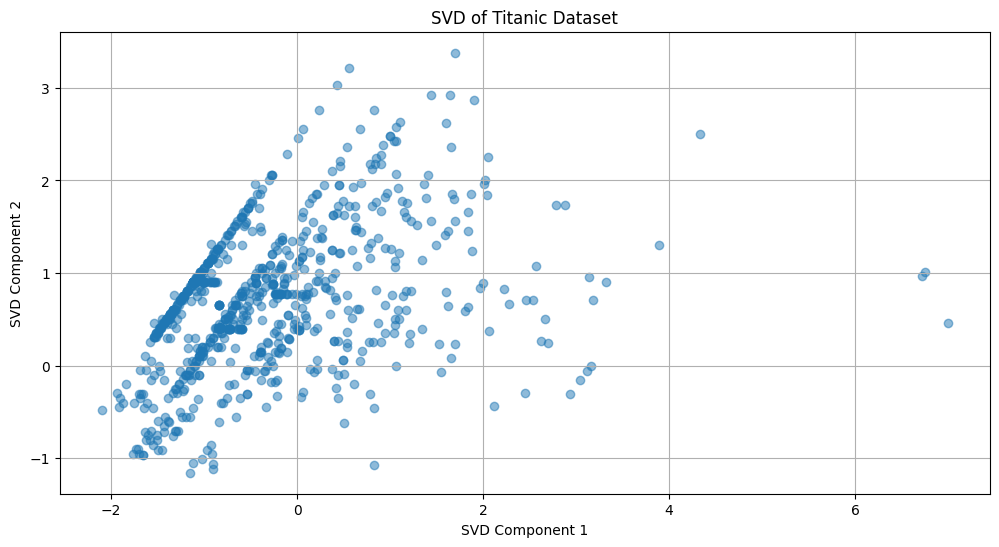

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("SVD of Titanic Dataset")
plt.grid(True)
plt.show()